# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dimas Raditya Sahputra]
- **Email:** [dimasrsahputra@gmail.com]
- **ID Dicoding:** [dimasahputra]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap penyewa sepeda Casual dan Registered?
- Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Wrangling

### Gathering Data

In [60]:
df_day = pd.read_csv('/content/drive/My Drive/data-andat-dimas/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

menilai tabel df_day

In [61]:
df_day.shape

(731, 16)

dapat dilihat total baris dan kolom data sebanyak 731 dan 16.

In [62]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


df_day.info(), digunakan untuk mengecek apakah ada data yang kosong, dari output diatas dapat dilihat bahwa data non-null berarti tidak ada data yang kosong

In [63]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari sintaks df_day.describe(), didapatkan analisis data dari hour.csv

### Cleaning Data

Cek data duplikat

In [64]:
print("Jumlah duplikasi: ", df_hours.duplicated().sum())

Jumlah duplikasi:  0


cek *Missing values*

In [65]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing values

In [66]:
# mengubah data cuaca 1,2,3,4
df_day['weathersit'] = df_day['weathersit'].map({
    1: 'cerah berawan',
    2: 'berawan',
    3: 'hujan',
    4: 'cuaca ekstrem'
})

# mengubah data season/musim 1,2,3,4
df_day['season'] = df_day['season'].map({
    1: 'Semi', 2: 'panas', 3: 'gugur', 4: 'dingin'
})

## Exploratory Data Analysis (EDA)

### Explore df_day



**mengelompokan penyewa sepeda berdasarkan keadaan cuaca**

In [67]:
df_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                max  min         mean      sum
weathersit                                    
berawan        8362  605  4035.862348   996858
cerah berawan  8714  431  4876.786177  2257952
hujan          4639   22  1803.285714    37869

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau berawan. Sangat sedikit ketika hujan dan tidak ada ketika cuaca sedang ekstrem

**mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan musin/season**

In [78]:
df_day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Semi     334.928177  2269.204420  7836   431  2604.132597
dingin   729.112360  3999.050562  8555    22  4728.162921
gugur   1202.611702  4441.691489  8714  1115  5644.303191
panas   1106.097826  3886.233696  8362   795  4992.331522

Berdasarkan hasil analisis diatas, penyewa sepeda baik Casual Dan Registered, paling banyak pada musim gugur, yang dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi dengan rata-rata yang paling kecil.

**mengelompokkan temp, hum, dan humidity berdasarkan musim/season**

In [70]:
df_day.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Semi    0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
dingin  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   
gugur   0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
panas   0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   

                            
             min      mean  
season                      
Semi    0.000000  0.582903  
dingin  0.333478  0.668719  
gugur   0.360000  0.633482  
panas   0.254167  0.626948

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan, pertama didapat rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur yang selanjutnya diikuti oleh musim panas, dingin, dan semi.
Kedua, rata-rata humidity tertinggi terjadi pada musim dingin yang selanjutnya diikuti oleh musim semi, gugur, dan panas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap penyewa sepeda Casual dan Registered?

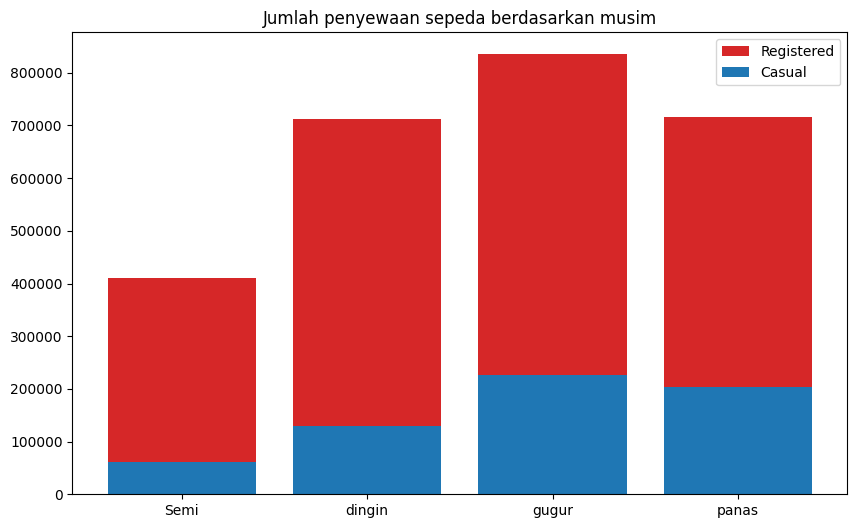

In [81]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:blue'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas dengan barplot, dapat diinterpretasikan bahwa di semua musim yang paling diminati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur, ldiikuti dengan musim panas, musim dingin dan diikuti dengan musim semi.

### Pertanyaan 2: Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda?

Text(0.5, 1.0, 'Humidity/kelembaban vs jumlah pengguna')

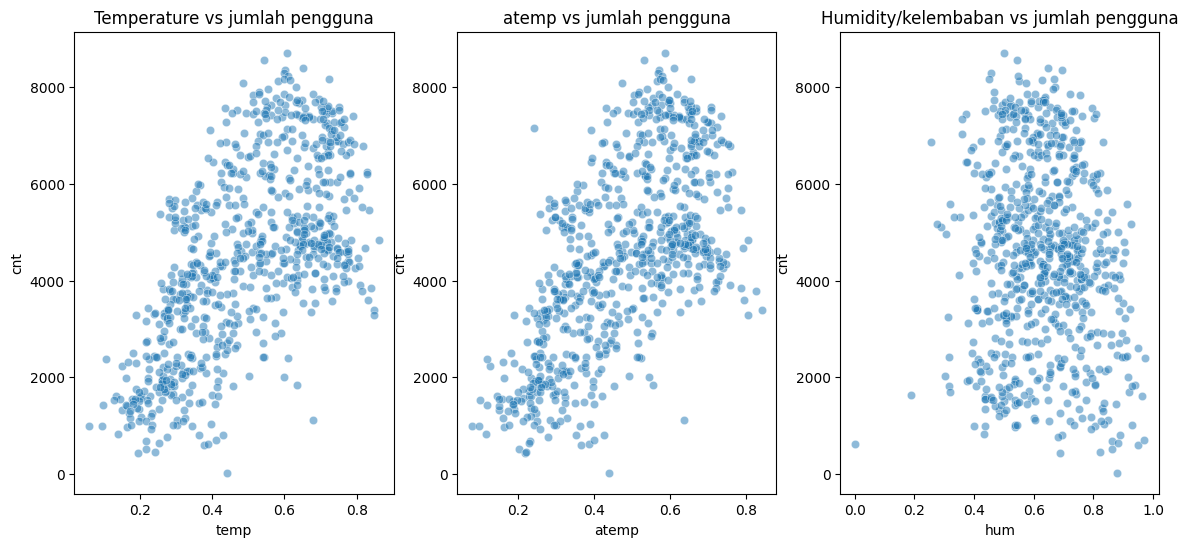

In [79]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('Temperature vs jumlah pengguna')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('atemp vs jumlah pengguna')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=df_day,
    alpha=0.5
)
plt.title('Humidity/kelembaban vs jumlah pengguna')

Didapatkan interpreatasi dari scatter plot diatas yaitu:
Hubungan antara temp dan count menunjukan korelasi yang positif diantara dua variabel.

Hubungan antara atemp dan count juga menunjukan korelasi yang positif diantara dua variabel.

Hubungan antara hum dan count menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena tidak terlalu condong ke arah kiri.

## Conclusion

**- Conclution pengaruh musim terhadap penyewa sepeda Casual dan Registered**

Dalam visualisasi tersebut, didapatkan hasil yang takterduga karena musim semi tidak menjadi yang paling sedikit peminatnya, melainkan yang terakhir adalah musim semi. Ini dapat dipengaruhi oleh berbagai faktor seperti cuaca, suhu udara, hari kerja, hari libur, dan faktor lainnya. Sementara itu, urutan pertama ditempati oleh musim guguryang berhasil mencapai lebih dari 800.000 penyewaan sepeda.


**- Conclution Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda**

Dari ketiga grafik yang disajikan, dapat disimpulkan bahwa suhu (temp dan atemp) berkorelasi positif dengan jumlah pengguna sepeda (count), yang menandakan bahwa kenaikan suhu akan menyebabkan peningkatan pengguna sepeda. Sebaliknya, kelembaban udara (Humidity) memiliki korelasi negatif yang sedikit dengan jumlah pengguna sepeda (count), meskipun tidak begitu signifikan, namun tetap dapat mengurangi jumlah pengguna sepeda ketika kelembaban udara meningkat.